In [1]:
from neural_net_utils import *
from feature_selection_utils import *

### Sfida tra `GradientBoostingRegressor` e `RegressionNet`

#### Feature analysis e selection con `GradientBoostingRegressor` (addestrato sul dataset `movies_not_binned.csv`)

In [2]:
df = pd.read_csv('../dataset/movies_not_binned.csv')

cols_to_retain = ['rating', 'genre', 'score', 'profit', 'age', 'runtime', 'votes', 'budget',
                  'director_num_movies', 'director_age', 'director_profit_mean', 'director_profit_std', 'director_score_mean', 'director_score_std',
                  'actor_num_movies', 'actor_age', 'actor_profit_mean', 'actor_profit_std', 'actor_score_mean', 'actor_score_std']

cols = {
    'target': 'score',
    'drop': list(df.columns.difference(cols_to_retain)),
    'dummies': ['rating', 'genre'],
    'labels': [],
    'round': [],
    'clipping': ['profit', 'votes', 'budget',
                 'director_profit_mean', 'actor_profit_mean',
                 'director_profit_std', 'actor_profit_std'],
    'standardize': ['runtime', 'director_age', 'actor_age'],
    'minmax': ['age', 'profit', 'votes', 'budget',
               'director_num_movies', 'actor_num_movies',
               'director_profit_mean', 'actor_profit_mean',
               'director_profit_std', 'actor_profit_std',
               'director_score_mean', 'actor_score_mean',
               'director_score_std', 'actor_score_std']
}

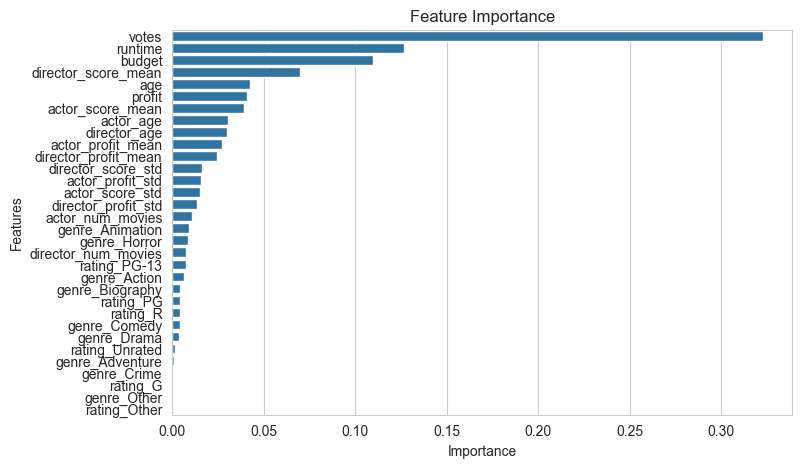

In [3]:
# studio l'importanza delle features
model_name = 'Gradient_Boosting_Regressor-not_binned'

study_model_with_best_features(model_name, df, cols, retain='all')

In [4]:
# scelgo il numero di features da mantenere e procedo con una RFE manuale, poi confronto i risultati

k = 11
study_model_with_best_features(model_name, df, cols, retain=k)

Removing genre_Action with importance 0.0006319223768053162
Removing genre_Other with importance 0.00022694187016503165
Removing actor_num_movies with importance 0.0006798520963452459
Removing genre_Animation with importance 3.8268595964841e-05
Removing director_profit_mean with importance 9.663110530566676e-05
Removing genre_Comedy with importance 0.00011289034632161465
Removing rating_G with importance 0.0006401516174475153
Removing actor_score_mean with importance 0.0004920556345797134
Removing director_num_movies with importance 0.002125276093374928
Removing rating_PG with importance 0.00010361469196501494
Removing genre_Crime with importance 0.00011592610898975009
Removing actor_score_std with importance 0.000531527304211632
Removing genre_Drama with importance 4.82396922030226e-05
Removing actor_profit_std with importance 0.00045307404838035303
Removing director_profit_std with importance 2.5892917855485642e-05
Removing director_age with importance 0.0010256436186258377
Removing 

,feature
0,profit
1,age
2,runtime
3,votes
4,budget
5,director_score_mean
6,director_score_std
7,actor_age
8,actor_profit_mean
9,rating_PG-13


Results after GridSearchCV:
Best parameters: {'max_depth': 4, 'min_samples_leaf': 6, 'min_samples_split': 8}
Best score: {'mean_squared_error': 0.4319}

Results after max_depth tuning:
Best parameters: {'max_depth': 4}
Best score: {'mean_squared_error': 0.4319}



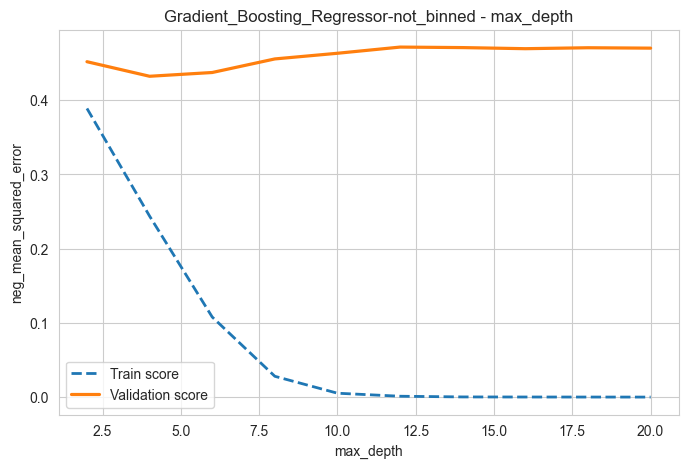

Test score:
MSE: 0.4164


In [4]:
# tuning e test dello stesso modello con le features più importanti
grid_params = {
    'max_depth': [4, 6],
    'min_samples_leaf': [6, 8, 10],
    'min_samples_split': [8, 10, 12],
}

best_features = ['votes', 'runtime', 'budget', 'age', 'profit',
                 'director_score_mean', 'actor_score_mean',
                 'director_profit_mean', 'actor_profit_mean',
                 'director_age', 'actor_age']

study_model_with_best_features(model_name, df, cols, best_features=best_features, grid_params=grid_params, task='regression')

#### Addestramento di `RegressionNet` solo sul dataset originale `movies_v2.csv`

In [3]:
df = pd.read_csv('../dataset/movies_v2.csv')

# colonne per l'addestramento
cols_to_retain = ['rating', 'genre', 'year', 'score', 'votes', 'budget', 'gross', 'runtime']

cols = {
    'target': 'score',
    'drop': list(df.columns.difference(cols_to_retain)),
    'dummies': ['rating', 'genre'],
    'labels': [],
    'round': [],
    'clipping': ['votes', 'budget', 'gross'],
    'standardize': ['runtime'],
    'minmax': ['year', 'votes', 'budget', 'gross']
}

Epoch 1 | train loss: 41.2934, val loss: 40.4612
Epoch 2 | train loss: 27.0155, val loss: 2.0081
Val loss (inf --> 2.0081)
Epoch 3 | train loss: 5.4351, val loss: 1.2385
Val loss (2.0081 --> 1.2385)
Epoch 4 | train loss: 4.7476, val loss: 1.3572
Early-stopping counter: 1/10
Epoch 5 | train loss: 4.4494, val loss: 1.0564
Val loss (1.2385 --> 1.0564)
Epoch 6 | train loss: 4.2567, val loss: 0.9350
Val loss (1.0564 --> 0.9350)
Epoch 7 | train loss: 4.1779, val loss: 1.0853
Early-stopping counter: 1/10
Epoch 8 | train loss: 4.1642, val loss: 1.0388
Early-stopping counter: 2/10
Epoch 9 | train loss: 3.9348, val loss: 0.7572
Val loss (0.9350 --> 0.7572)
Epoch 10 | train loss: 3.8821, val loss: 1.1669
Early-stopping counter: 1/10
Epoch 11 | train loss: 3.8460, val loss: 0.9659
Early-stopping counter: 2/10
Epoch 12 | train loss: 3.7834, val loss: 0.7202
Val loss (0.7572 --> 0.7202)
Epoch 13 | train loss: 3.7668, val loss: 0.6611
Val loss (0.7202 --> 0.6611)
Epoch 14 | train loss: 3.6013, val lo

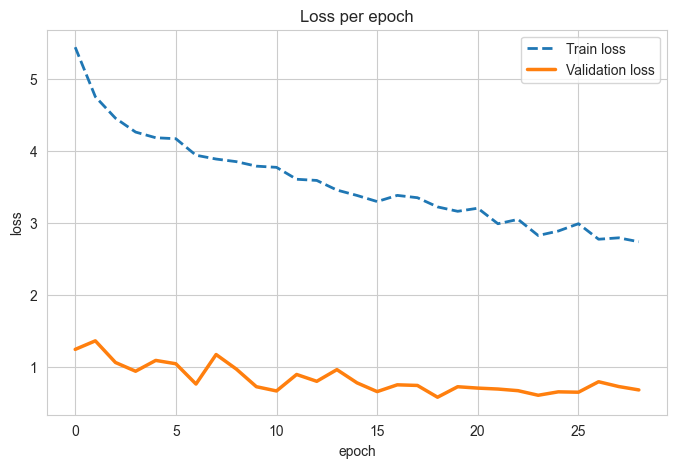


Test loss: 0.5092


In [4]:
train_and_test_net(df, cols, task='regression')

#### Addestramento di `RegressionNet` solo sul dataset `movies_not_binned.csv` (solo con le $k$ features più importanti)

In [5]:
df = pd.read_csv('../dataset/movies_not_binned.csv')

cols_to_retain = ['rating', 'genre', 'score', 'profit', 'age', 'runtime', 'votes', 'budget',
                  'director_num_movies', 'director_age', 'director_profit_mean', 'director_profit_std', 'director_score_mean', 'director_score_std',
                  'actor_num_movies', 'actor_age', 'actor_profit_mean', 'actor_profit_std', 'actor_score_mean', 'actor_score_std']

cols = {
    'target': 'score',
    'drop': list(df.columns.difference(cols_to_retain)),
    'dummies': ['rating', 'genre'],
    'labels': [],
    'round': [],
    'clipping': ['profit', 'votes', 'budget',
                 'director_profit_mean', 'actor_profit_mean',
                 'director_profit_std', 'actor_profit_std'],
    'standardize': ['runtime', 'director_age', 'actor_age'],
    'minmax': ['age', 'profit', 'votes', 'budget',
               'director_num_movies', 'actor_num_movies',
               'director_profit_mean', 'actor_profit_mean',
               'director_profit_std', 'actor_profit_std',
               'director_score_mean', 'actor_score_mean',
               'director_score_std', 'actor_score_std']
}

Epoch 1 | train loss: 41.3352, val loss: 39.1628
Epoch 2 | train loss: 20.7129, val loss: 1.8848
Val loss (inf --> 1.8848)
Epoch 3 | train loss: 5.5846, val loss: 2.0763
Early-stopping counter: 1/10
Epoch 4 | train loss: 5.3251, val loss: 1.7809
Val loss (1.8848 --> 1.7809)
Epoch 5 | train loss: 4.8674, val loss: 1.8036
Early-stopping counter: 1/10
Epoch 6 | train loss: 4.8296, val loss: 1.7795
Val loss (1.7809 --> 1.7795)
Epoch 7 | train loss: 4.7849, val loss: 1.3785
Val loss (1.7795 --> 1.3785)
Epoch 8 | train loss: 4.5527, val loss: 1.4911
Early-stopping counter: 1/10
Epoch 9 | train loss: 4.4977, val loss: 1.0261
Val loss (1.3785 --> 1.0261)
Epoch 10 | train loss: 4.3384, val loss: 0.9638
Val loss (1.0261 --> 0.9638)
Epoch 11 | train loss: 4.3185, val loss: 0.9666
Early-stopping counter: 1/10
Epoch 12 | train loss: 4.0869, val loss: 0.9158
Val loss (0.9638 --> 0.9158)
Epoch 13 | train loss: 3.9674, val loss: 0.8950
Val loss (0.9158 --> 0.8950)
Epoch 14 | train loss: 4.1866, val lo

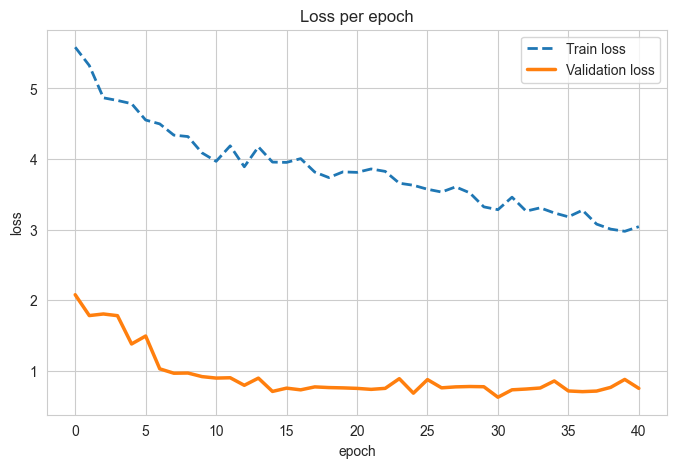


Test loss: 0.5884


In [6]:
best_features = ['votes', 'runtime', 'budget', 'age', 'profit',
                 'director_score_mean', 'actor_score_mean',
                 'director_profit_mean', 'actor_profit_mean',
                 'director_age', 'actor_age']

train_and_test_net(df, cols, features=best_features, task='regression')

### Sfida tra `RandomForestClassifier` e `ClassificationNet`

#### Feature analysis e selection con `RandomForestClassifier` (addestrato sul dataset `movies_not_binned.csv`)

In [7]:
df = pd.read_csv('../dataset/movies_not_binned.csv')

# colonne per l'addestramento
cols_to_retain = ['rating', 'genre', 'profitability', 'cultness', 'age', 'runtime', 'budget',
                  'director_num_movies', 'director_age', 'director_profit_mean', 'director_profit_std', 'director_score_mean', 'director_score_std',
                  'actor_num_movies', 'actor_age', 'actor_profit_mean', 'actor_profit_std', 'actor_score_mean', 'actor_score_std']

cols = {
    'target': 'profitability',
    'drop': list(df.columns.difference(cols_to_retain)),
    'dummies': ['rating', 'genre'],
    'labels': [],
    'round': [],
    'clipping': ['budget', 'director_profit_mean', 'actor_profit_mean',
                 'director_profit_std', 'actor_profit_std'],
    'standardize': ['cultness', 'runtime', 'director_age', 'actor_age'],
    'minmax': ['age', 'budget', 'director_num_movies', 'actor_num_movies',
               'director_profit_mean', 'actor_profit_mean',
               'director_profit_std', 'actor_profit_std',
               'director_score_mean', 'actor_score_mean',
               'director_score_std', 'actor_score_std']
}

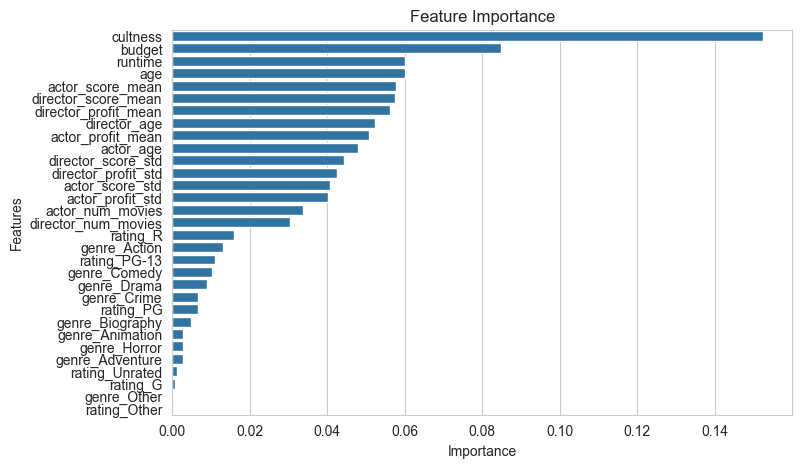

In [8]:
model_name = 'Random_Forest_Classifier-not_binned'

study_model_with_best_features(model_name, df, cols, retain='all')

In [9]:
# scelgo il numero di features da mantenere e procedo con una RFE manuale, poi confronto i risultati

k = 14
study_model_with_best_features(model_name, df, cols, retain=k, resample=True, task='classification')

Removing actor_profit_std with importance 0.0000
Removing director_score_mean with importance 0.0000
Removing runtime with importance 0.0007
Removing director_score_std with importance 0.0007
Removing director_profit_std with importance 0.0007
Removing rating_G with importance 0.0000
Removing director_profit_mean with importance 0.0007
Removing genre_Action with importance 0.0000
Removing actor_score_std with importance 0.0007
Removing rating_PG with importance 0.0015
Removing genre_Comedy with importance 0.0007
Removing genre_Crime with importance 0.0000
Removing rating_PG-13 with importance 0.0000
Removing genre_Animation with importance 0.0007
Removing genre_Drama with importance 0.0007
Removing rating_Unrated with importance 0.0015
Removing actor_score_mean with importance 0.0007


,feature
0,cultness
1,age
2,budget
3,director_num_movies
4,director_age
5,actor_num_movies
6,actor_age
7,actor_profit_mean
8,rating_Other
9,rating_R
